<div style="background-color:#2E87A4 ;color:#FDFDFD;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="14" color="#FDFDFD" face="Lora"><i>Medical Cost Prediction(Healthcare Domain)</i></font> </p>
</div>

# Importing the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [4]:
df=pd.read_csv(r"C:\Users\61491\Desktop\Inn DS\DS_excel_sheets\insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# Data Cleaning

## Check for duplicates

In [3]:
df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [4]:
# Identify the existing duplicate

df[df.duplicated()]

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [5]:
# Drop the duplicate

df.drop_duplicates(keep='first',inplace=True)

#Reset the index
df.reset_index(inplace=True)

df.drop(['index'],axis=1,inplace=True)

df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1332   50    male  30.970         3     no  northwest  10600.54830
1333   18  female  31.920         0     no  northeast   2205.98080
1334   18  female  36.850         0     no  southeast   1629.83350
1335   21  female  25.800         0     no  southwest   2007.94500
1336   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

## Check for missing values

In [6]:
df.isna()
df.isna().sum()

age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1332  False  False  False     False   False   False    False
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False

[1337 rows x 7 columns]

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Null values do not exist

## Check for Corrupted Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# No Corrupted Data

## Outliers

In [10]:
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.age)

plt.subplot(122)
sns.histplot(df.age, kde = True)
plt.axvline(df.age.mean(), color = 'green')
plt.axvline(df.age.median(), color = 'red');

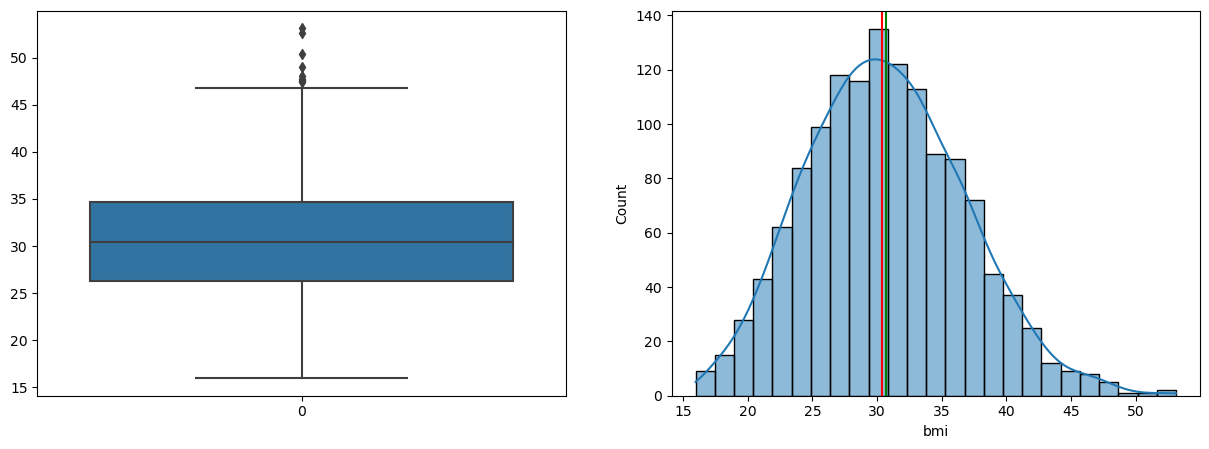

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.bmi)

plt.subplot(122)
sns.histplot(df.bmi, kde = True)
plt.axvline(df.bmi.mean(), color = 'green')
plt.axvline(df.bmi.median(), color = 'red');

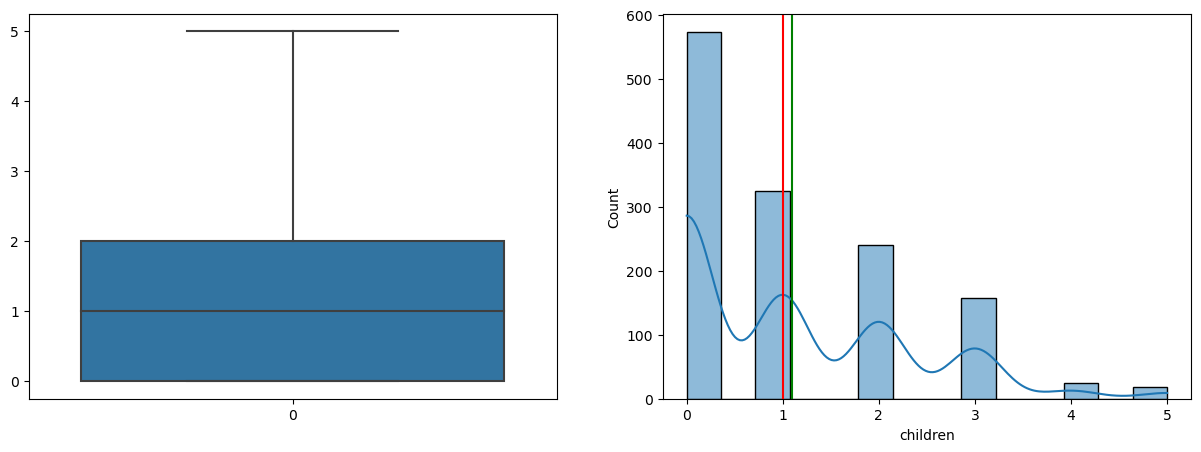

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.children)

plt.subplot(122)
sns.histplot(df.children, kde = True)
plt.axvline(df.children.mean(), color = 'green')
plt.axvline(df.children.median(), color = 'red');

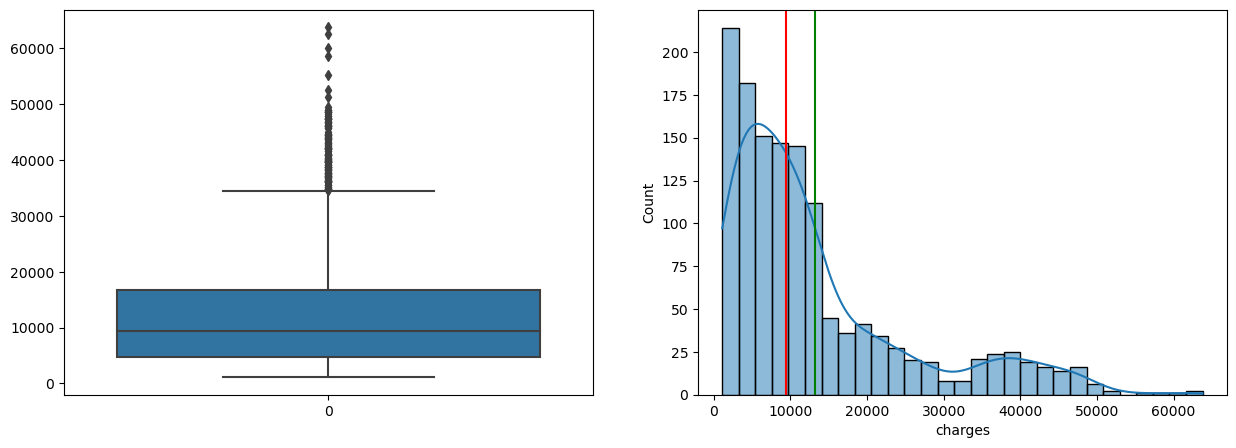

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.charges)

plt.subplot(122)
sns.histplot(df.charges, kde = True)
plt.axvline(df.charges.mean(), color = 'green')
plt.axvline(df.charges.median(), color = 'red');

# Data Visualization

## Univariate Analysis

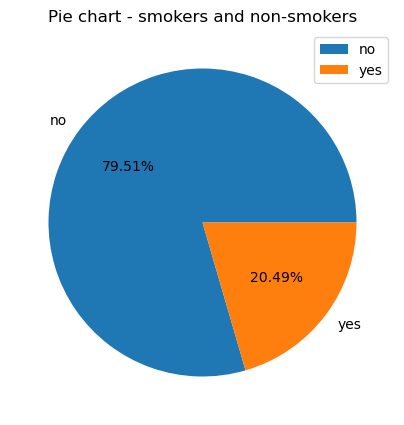

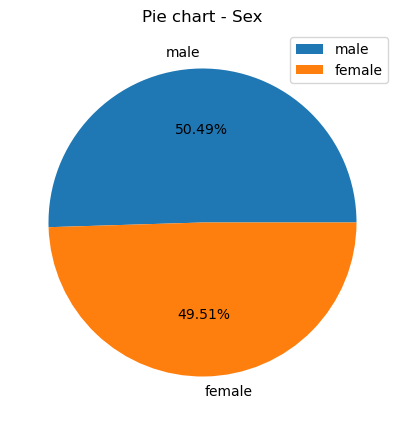

In [15]:
plt.figure(figsize=(5,5),dpi=100)
plt.pie(x=df.smoker.value_counts().values,labels=df.smoker.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - smokers and non-smokers")
plt.legend(loc='upper right');

plt.figure(figsize=(5,5),dpi=100)
plt.pie(x=df.sex.value_counts().values,labels=df.sex.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - Sex")
plt.legend(loc='upper right');

## Bivariate Analysis

In [16]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x="smoker",y="charges",data=df,ci=False,width=0.4)
plt.title("Bar chart - Smoker Vs Charges")
plt.xlabel("Smoker/non-smoker",fontsize=10,color="black")
plt.ylabel("Charges",fontsize=10,color="black");

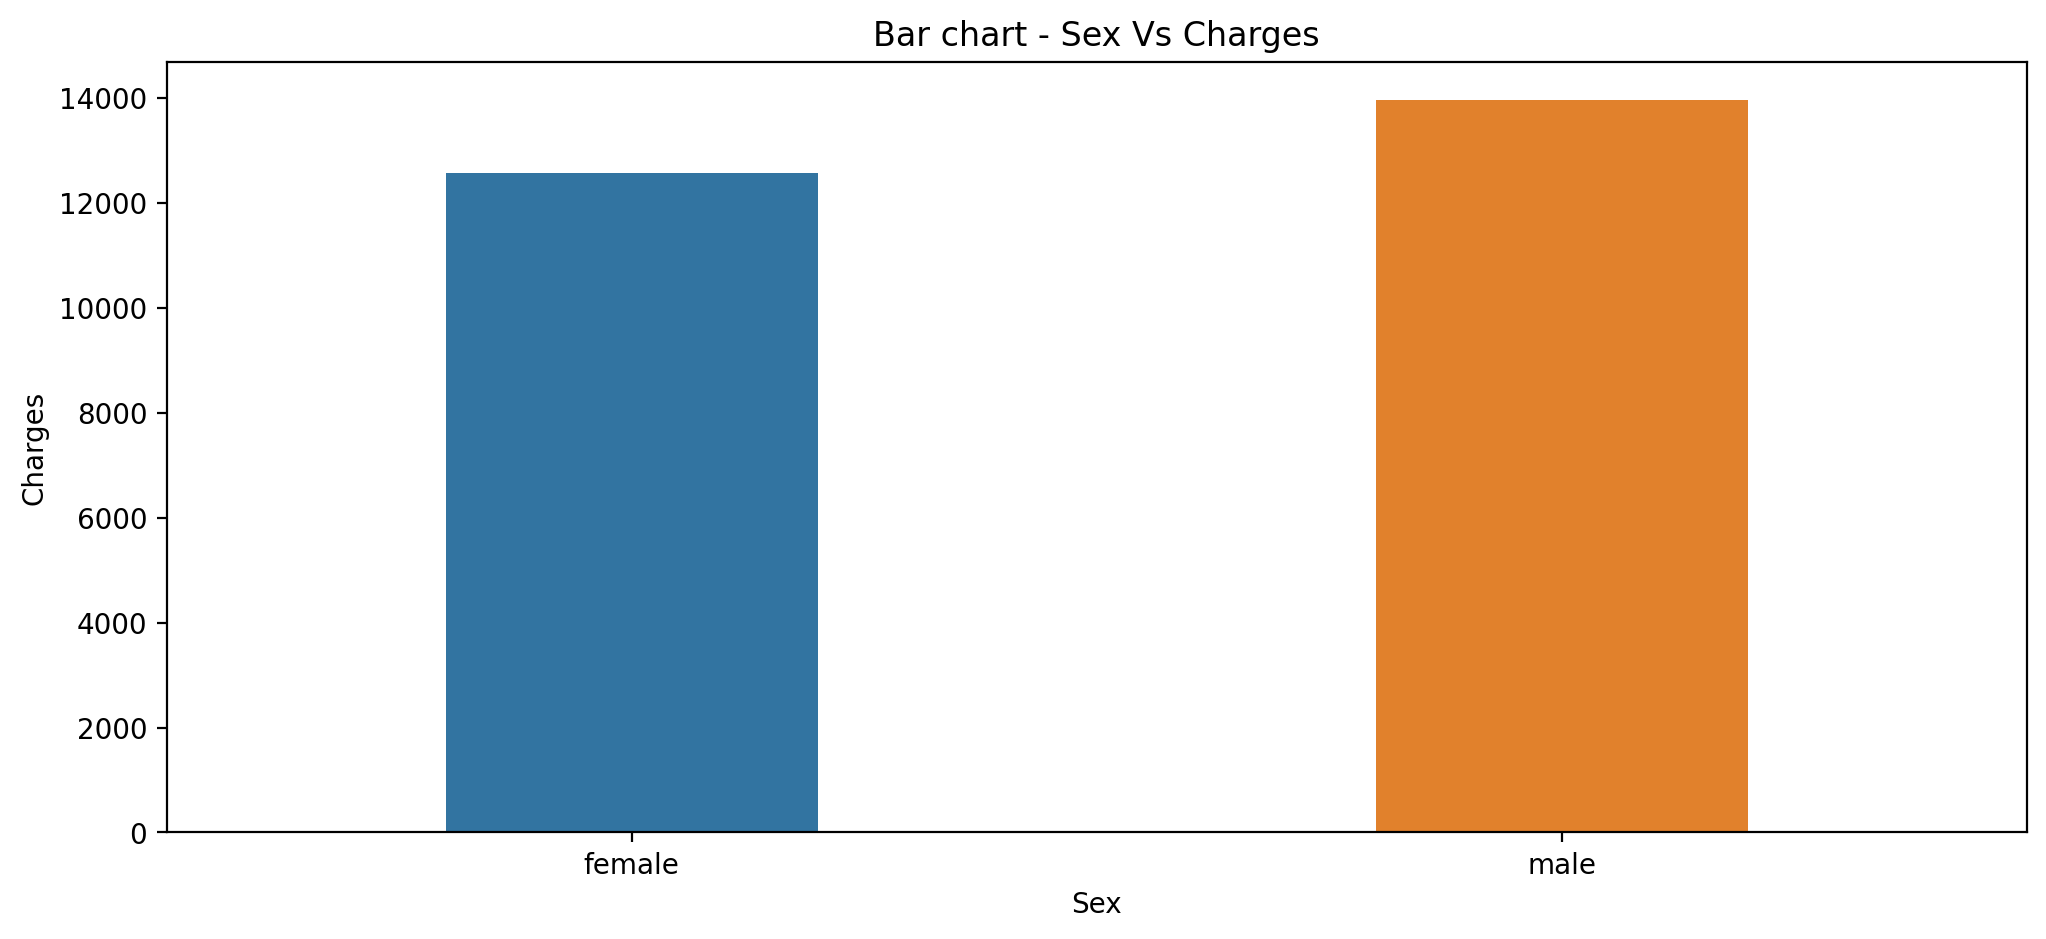

In [17]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x="sex",y="charges",data=df,ci=False,width=0.4)
plt.title("Bar chart - Sex Vs Charges")
plt.xlabel("Sex",fontsize=10,color="black")
plt.ylabel("Charges",fontsize=10,color="black");

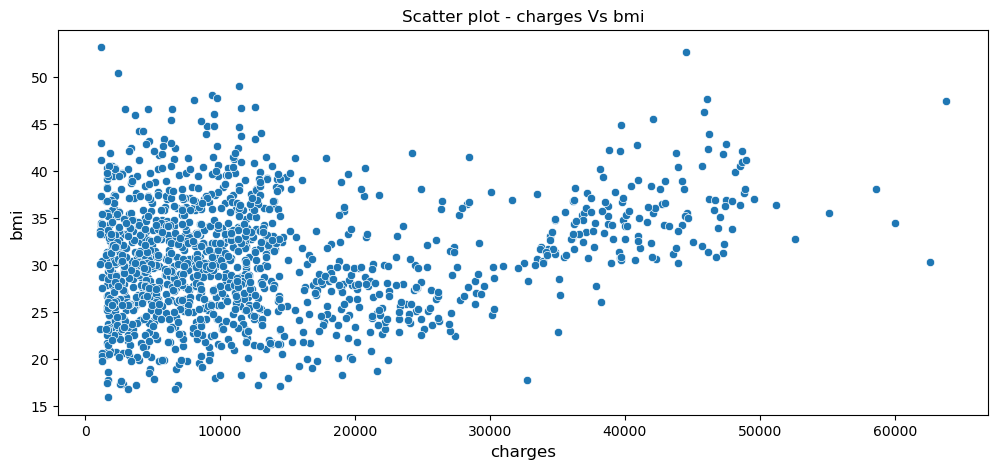

In [18]:
plt.figure(figsize=(12,5),dpi=100)
sns.scatterplot(x="charges",y="bmi",data=df)
plt.title("Scatter plot - charges Vs bmi")
plt.xlabel("charges",fontsize=12)
plt.ylabel("bmi",fontsize=12);

# Multivariate Analysis

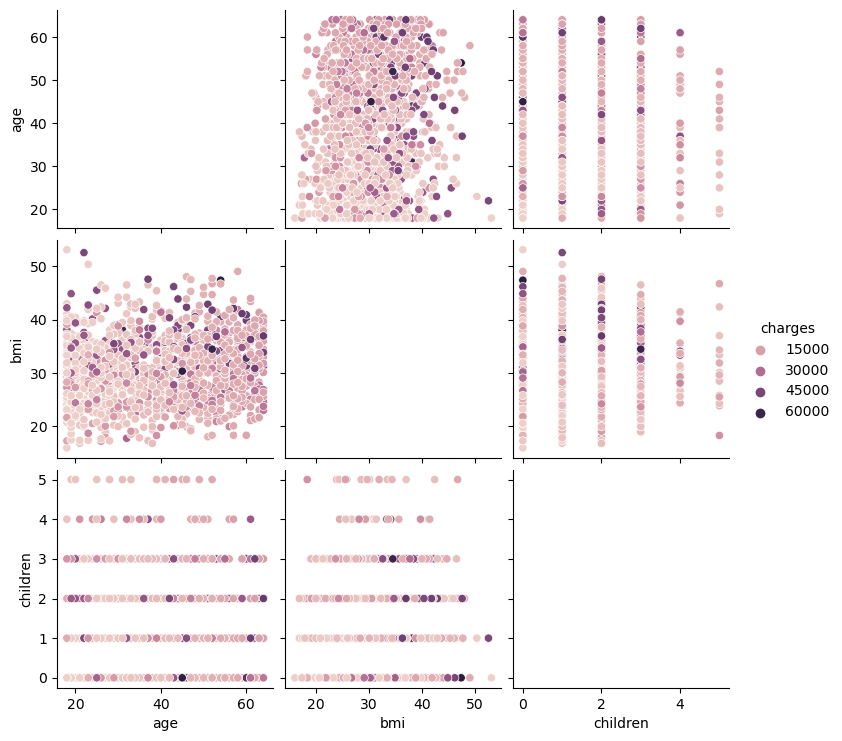

In [19]:
sns.pairplot(df, hue='charges')

# Data Preparation

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [20]:
import sklearn

print(sklearn.__version__)

1.2.0


In [7]:
# Identifying the inputs (X) and output (y)

y = df['charges']
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [8]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

X_train.head()

age     sex    bmi  children smoker     region
1075   32  female  29.59         1     no  southeast
131    61  female  22.04         0     no  northeast
15     19    male  24.60         1     no  southwest
1223   20  female  24.42         0    yes  southeast
1137   26  female  22.23         0     no  northwest

In [23]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(935, 6) (935,)
(402, 6) (402,)


## b. Separating Categorical and Numerical Columns

In [24]:
X_train.head()

age     sex     bmi  children smoker     region
196    39  female  32.800         0     no  southwest
1102   58    male  36.080         0     no  southeast
183    44  female  26.410         0     no  northwest
1297   33    male  27.455         2     no  northwest
471    18  female  30.115         0     no  northeast

In [25]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [26]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

sex smoker     region
196   female     no  southwest
1102    male     no  southeast
183   female     no  northwest
1297    male     no  northwest
471   female     no  northeast

In [27]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

age     bmi  children
196    39  32.800         0
1102   58  36.080         0
183    44  26.410         0
1297   33  27.455         2
471    18  30.115         0

## c. Scaling the Numerical Features

In [28]:
X_train_num.head()

age     bmi  children
196    39  32.800         0
1102   58  36.080         0
183    44  26.410         0
1297   33  27.455         2
471    18  30.115         0

In [29]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

age       bmi  children
196  -0.025397  0.323114 -0.900584
1102  1.329470  0.859103 -0.900584
183   0.331147 -0.721086 -0.900584
1297 -0.453249 -0.550321  0.740832
471  -1.522880 -0.115646 -0.900584

In [30]:
X_train_num.describe()

age         bmi    children
count  935.00000  935.000000  935.000000
mean    39.35615   30.822701    1.097326
std     14.03103    6.122794    1.219112
min     18.00000   15.960000    0.000000
25%     27.00000   26.410000    0.000000
50%     39.00000   30.495000    1.000000
75%     51.00000   34.930000    2.000000
max     64.00000   53.130000    5.000000

In [31]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.35614973 30.82270053  1.0973262 ]
Std of each column: [14.02352501  6.11951854  1.2184602 ]


## d. Applying OneHotEncoding on Categorical Columns

In [32]:
X_train_cat['sex'].value_counts(normalize=True)

female    0.505882
male      0.494118
Name: sex, dtype: float64

In [33]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.79893
yes    0.20107
Name: smoker, dtype: float64

In [34]:
X_train_cat['sex'].value_counts(normalize=True)

female    0.505882
male      0.494118
Name: sex, dtype: float64

In [35]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

sex_male  smoker_yes  region_northwest  region_southeast  \
196        0.0         0.0               0.0               0.0   
1102       1.0         0.0               0.0               1.0   
183        0.0         0.0               1.0               0.0   
1297       1.0         0.0               1.0               0.0   
471        0.0         0.0               0.0               0.0   

      region_southwest  
196                1.0  
1102               0.0  
183                0.0  
1297               0.0  
471                0.0

## e. Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [36]:

X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

age       bmi  children  sex_male  smoker_yes  region_northwest  \
196  -0.025397  0.323114 -0.900584       0.0         0.0               0.0   
1102  1.329470  0.859103 -0.900584       1.0         0.0               0.0   
183   0.331147 -0.721086 -0.900584       0.0         0.0               1.0   
1297 -0.453249 -0.550321  0.740832       1.0         0.0               1.0   
471  -1.522880 -0.115646 -0.900584       0.0         0.0               0.0   

      region_southeast  region_southwest  
196                0.0               1.0  
1102               1.0               0.0  
183                0.0               0.0  
1297               0.0               0.0  
471                0.0               0.0

## f. Preparing Test Data

In [37]:
X_test.head()

age     sex    bmi  children smoker     region
1247   18  female  39.82         0     no  southeast
609    47  female  29.37         1     no  southeast
393    49    male  31.35         1     no  northeast
503    19    male  30.25         0    yes  southeast
198    51  female  18.05         0     no  northwest

In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 1247 to 1162
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       402 non-null    int64  
 1   sex       402 non-null    object 
 2   bmi       402 non-null    float64
 3   children  402 non-null    int64  
 4   smoker    402 non-null    object 
 5   region    402 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 22.0+ KB


In [39]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

sex smoker     region
1247  female     no  southeast
609   female     no  southeast
393     male     no  northeast
503     male    yes  southeast
198   female     no  northwest

In [40]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

age    bmi  children
1247   18  39.82         0
609    47  29.37         1
393    49  31.35         1
503    19  30.25         0
198    51  18.05         0

In [41]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

age       bmi  children
1247 -1.522880  1.470263 -0.900584
609   0.545073 -0.237388 -0.079876
393   0.687691  0.086167 -0.079876
503  -1.451572 -0.093586 -0.900584
198   0.830308 -2.087207 -0.900584

In [42]:
X_test_cat_ohe = pd.DataFrame(index = X_test_cat.index)

X_test_cat_ohe.head()

Empty DataFrame
Columns: []
Index: [1247, 609, 393, 503, 198]

In [43]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

sex_male  smoker_yes  region_northwest  region_southeast  \
1247       0.0         0.0               0.0               1.0   
609        0.0         0.0               0.0               1.0   
393        1.0         0.0               0.0               0.0   
503        1.0         1.0               0.0               1.0   
198        0.0         0.0               1.0               0.0   

      region_southwest  
1247               0.0  
609                0.0  
393                0.0  
503                0.0  
198                0.0

In [44]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

age       bmi  children  sex_male  smoker_yes  region_northwest  \
1247 -1.522880  1.470263 -0.900584       0.0         0.0               0.0   
609   0.545073 -0.237388 -0.079876       0.0         0.0               0.0   
393   0.687691  0.086167 -0.079876       1.0         0.0               0.0   
503  -1.451572 -0.093586 -0.900584       1.0         1.0               0.0   
198   0.830308 -2.087207 -0.900584       0.0         0.0               1.0   

      region_southeast  region_southwest  
1247               1.0               0.0  
609                1.0               0.0  
393                0.0               0.0  
503                1.0               0.0  
198                0.0               0.0

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [46]:
y_test_pred = regressor.predict(X_test_transformed)

In [47]:
medical_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_df.head()

Actual     Predicted
1247   1633.9618   5166.958334
609    8547.6913   9601.121191
393    9290.1395  11400.879099
503   32548.3405  26117.898110
198    9644.2525   7001.185205

In [48]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

In [49]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4240.869937991888
Mean Squared Error:  38832590.88652549
Root Mean Squared Error:  6231.5801275860595


# KNN Regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [51]:
y_test_pred = regressor.predict(X_test_transformed)

In [52]:
medical_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_df.head()

Actual     Predicted
1247   1633.9618   4211.890170
609    8547.6913   7948.160220
393    9290.1395   9336.827060
503   32548.3405  21088.622942
198    9644.2525  11108.725660

<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

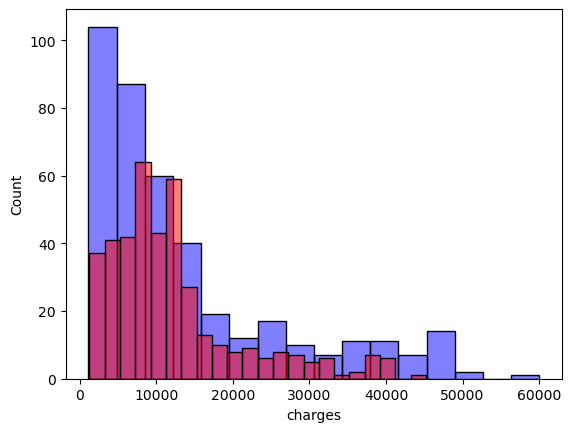

In [53]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [54]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4418.496121992538
Mean Squared Error:  53048341.73131505
Root Mean Squared Error:  7283.429256285465


# Decision Tree Regression

In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [56]:
y_test_pred = regressor.predict(X_test_transformed)

In [57]:
medical_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_df.head()

Actual   Predicted
1247   1633.9618   1634.5734
609    8547.6913   7789.6350
393    9290.1395   9778.3472
503   32548.3405  34166.2730
198    9644.2525   9264.7970

<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

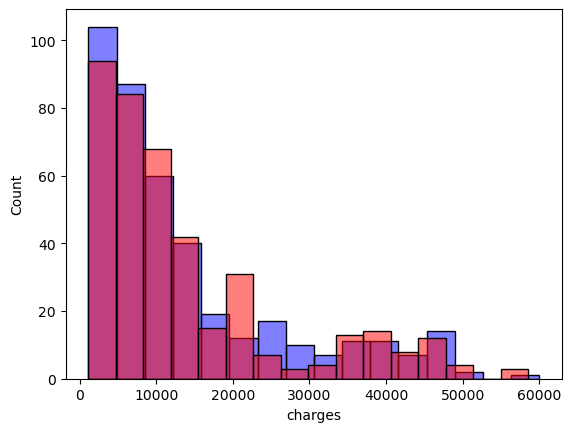

In [58]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [59]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3275.980544562189
Mean Squared Error:  45729929.23598315
Root Mean Squared Error:  6762.390792906244


# Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [61]:
y_test_pred = regressor.predict(X_test_transformed)

In [62]:
medical_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_df.head()

Actual     Predicted
1247   1633.9618   2251.498096
609    8547.6913  10478.341363
393    9290.1395   9129.897059
503   32548.3405  34422.105411
198    9644.2525  10095.218070

<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

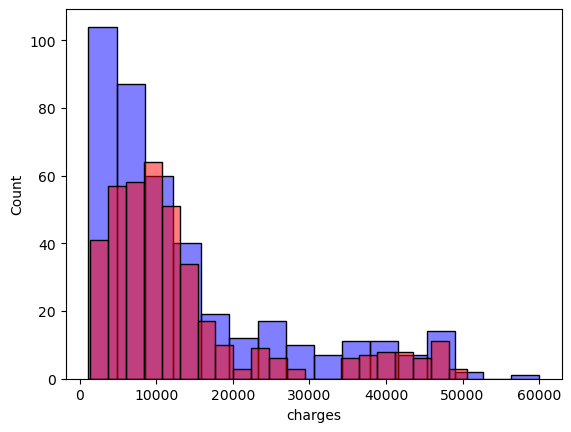

In [63]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [64]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2743.111712263141
Mean Squared Error:  24266220.208347738
Root Mean Squared Error:  4926.075538229975


# Gradient Boosting Regression 

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train_transformed, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
y_test_pred = reg.predict(X_test_transformed)

<AxesSubplot: xlabel='charges', ylabel='Count'>

<AxesSubplot: xlabel='charges', ylabel='Count'>

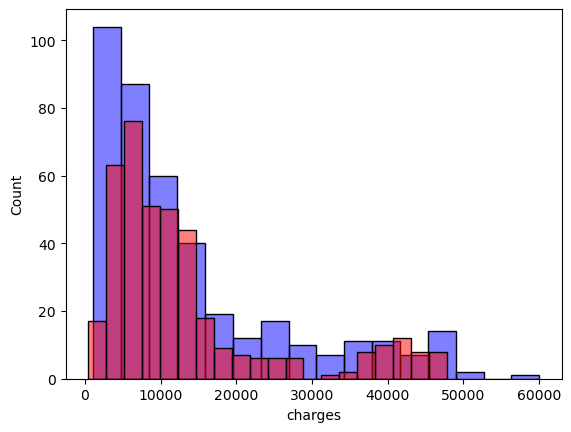

In [71]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [69]:
medical_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [70]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2671.2820990413393
Mean Squared Error:  22499941.492767375
Root Mean Squared Error:  4743.410323044737


# Observations
- Linear Regression - Mean Absolute Error:  4240.869937991888
- KNN Regression - Mean Absolute Error: 4418.496121992538
- Decision Tree Regression - Mean Absolute Error:  3275.980544562189
- Random Forest Regression - Mean Absolute Error:  2743.111712263141
- **Gradient Boosting Regression** - Mean Absolute Error:  2671.2820990413393

Evidently, Least Mean Absolute error was obtained on applying Gradient Boosting Regression model.
